<a href="https://www.kaggle.com/code/ibrahimawad02/attrition-project?scriptVersionId=140436270" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Welcome to the Attrition Project
***
## Introduction
<span style="font-size:17px;"> This notebook contains data about an HR company where they are studying the data of the employees to analyse and get insights about leaving employees. </span>
## Agenda
- <span style = 'font-size:17px;'> Firstly, we will read the data and see if it can be reduced </span>
- <span style = 'font-size:17px;'> We are going to answer the given questions then visualize the answer. </span>
- <span style = 'font-size:17px;'> Conclusions. </span> <br>
><span style = 'font-size:20px;'> presented to you by **Ibrahim Awad** </span>

## Questions:
Business Questions :
1. How Is Attrition Affected by Gender?
2. How Is Attrition Affected by business travels?
3. what is effect of the distance from home on attrition ?
4. People who live more than 25 minutes away from work tend to be less happy than those who don't. Lets see whether this is the case.
5. What is the most Department of attritions ? Does the Department of work impact attrition?
6. What is effect of YearsWithCurrManager on attrition ? Are managers a reason of people resigning ?
7. What is the most job role of attritions ?
8. Is salary is one of the main reasons?
9. Does hike percentage impact Attrition?
10. Does company stocks for employees impact attrition?
11. How much does income matter?
12. what is effect of age on attrition ?
13. What role does gender and age play in this workplace?
14. How does work experience affect attrition?
15. Do Education Field play a role? Which Education Field is more likely to leave?
16. Are more educated people more likely to leave?
17. How does the environment satisfaction impact attrition?
18. How does self Job Satisfaction impact the Attrition?
19. How does Work Life Balance impact the overall attrition rates?
20. How does satisfaction and work-life balance relate to employee retention?
21. Is it possible that employees are leaving because of the work environment?
22. How does work duration in current role impact Attrition?
23. Do overtime stresses employees and makes them have to leave?
24. Is JobLevel equivalent to performance? Can we create a feature to measure this?
25. What factors contribute to retaining high performing employees?
26. How many new hires leave in less than a year and why?
27. What is the rate of resignations each year versus the rate of new appointments?
28. Does the source of the employee matter? Which website produces the best employees? What sources are best for high performing employees?
29. Which business unit faces the attrition problem?
30. What business value does the model bring?
31. Will the model save lots of money?
32. What factors are contributing more to employee attrition? Is income the main factor towards employee attrition?
33. What type of measures should the company take in order to retain their employees?

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

from sklearn.preprocessing import LabelEncoder # For enumerating categorical data

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Data reading
df = pd.read_csv("/kaggle/input/attrition/Attrition.csv", sep =',', encoding = 'utf-8')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1408,23,No,Travel_Rarely,571,Research & Development,12,2,Other,1,1982,...,3,80,0,5,6,4,5,2,1,4
364,37,No,Travel_Rarely,921,Research & Development,10,3,Medical,1,486,...,2,80,1,17,3,3,5,4,0,3
341,38,No,Travel_Rarely,343,Research & Development,15,2,Life Sciences,1,461,...,2,80,1,12,3,3,11,10,2,9
243,40,No,Travel_Rarely,1300,Research & Development,24,2,Technical Degree,1,335,...,1,80,2,9,3,3,9,8,4,7
462,34,No,Travel_Rarely,258,Sales,21,4,Life Sciences,1,621,...,4,80,0,10,3,3,10,7,5,7
1217,24,No,Travel_Rarely,581,Research & Development,9,3,Medical,1,1707,...,4,80,1,5,1,3,5,3,0,4
313,33,No,Travel_Frequently,553,Research & Development,5,4,Life Sciences,1,428,...,2,80,2,12,2,3,10,6,8,8
186,40,No,Travel_Rarely,989,Research & Development,4,1,Medical,1,253,...,2,80,1,21,2,3,20,8,9,9
414,24,Yes,Travel_Rarely,1448,Sales,1,1,Technical Degree,1,554,...,2,80,0,6,4,3,5,3,1,4
1059,35,No,Travel_Rarely,660,Sales,7,1,Life Sciences,1,1492,...,1,80,1,1,3,3,1,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

- <span style = font-size:18px;> Since all of them are over 18 then we can drop this column </span>

In [6]:
df.drop('Over18', axis = 1, inplace = True)

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df.describe(include = 'O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


/tmp/ipykernel_21/3039470410.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = "viridis")


<Axes: >

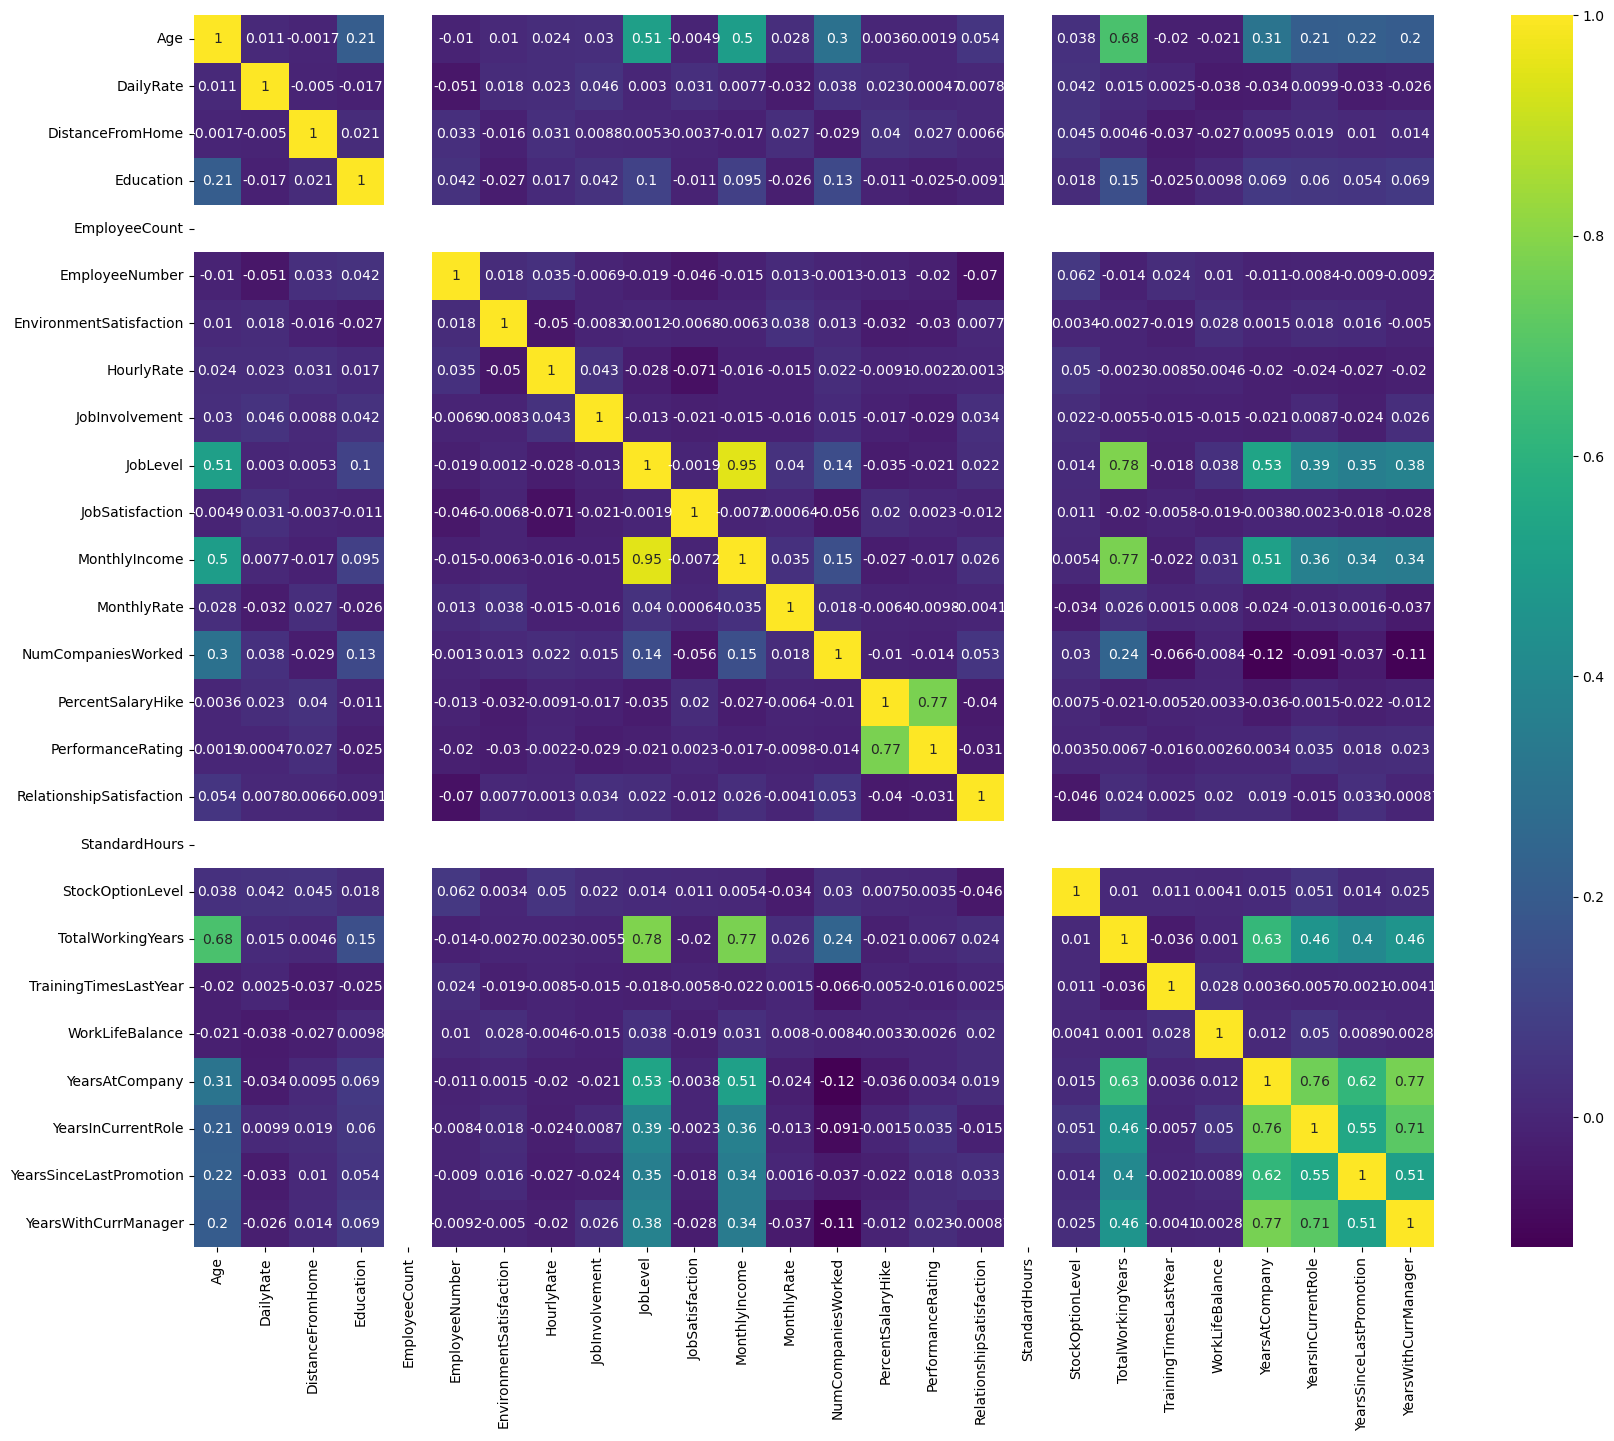

In [9]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot = True, cmap = "viridis")

In [10]:
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

- <span style = 'font-size:17px;'> Since this column only one value we will store the value in a variable if we need it and will drop them from the dataframe </span>

In [11]:
EmployeeCount = 1
StandardHours = 80

In [12]:
df.drop(['EmployeeCount', 'StandardHours'], axis = 1, inplace = True)

In [13]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
974,27,No,Travel_Frequently,793,Sales,2,1,Life Sciences,1371,4,...,4,2,0,8,3,3,6,2,0,0
919,59,No,Travel_Rarely,1429,Research & Development,18,4,Medical,1283,4,...,3,4,0,25,6,2,9,7,5,4
668,28,No,Travel_Rarely,995,Research & Development,9,3,Medical,930,3,...,3,2,1,6,2,3,2,2,2,2
731,20,Yes,Travel_Rarely,1097,Research & Development,11,3,Medical,1016,4,...,3,1,0,1,2,3,1,0,0,0
744,37,Yes,Travel_Rarely,1141,Research & Development,11,2,Medical,1033,1,...,3,1,0,15,2,1,1,0,0,0


In [14]:
df[['YearsSinceLastPromotion','YearsInCurrentRole']].corr()

,YearsSinceLastPromotion,YearsInCurrentRole
YearsSinceLastPromotion,1.000000,0.548056
YearsInCurrentRole,0.548056,1.000000


<span style = 'font-size:17px;'> I thought that the years since last promotion and years in current role would be one but it is not true. May be because that if the employee changed the company the years in current role will change </span>

In [15]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSince

***
# Answering Questions
## Question 1 : How Is Attrition Affected by Gender?

In [16]:
df.groupby(['Attrition', 'Gender']).count()[['EmployeeNumber']]/df.shape[0]*100

EmployeeNumber
Attrition Gender                
No        Female       34.081633
          Male         49.795918
Yes       Female        5.918367
          Male         10.204082

<Axes: xlabel='Attrition', ylabel='Count'>

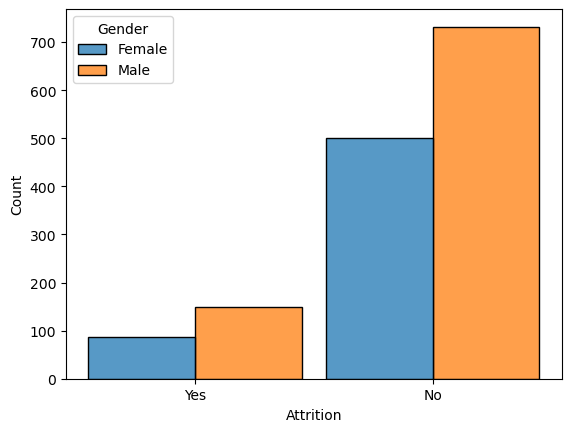

In [17]:
sns.histplot(data = df, hue = 'Gender', x = 'Attrition', multiple = 'dodge', shrink = .9)

- <span style = 'font-size:17px;'> It is noted that the number of males is larger than number of females in both of them but the percentage of Attrition males is 10.2/60\*100 which is 17% of males while the percentage of Attrition females is 5.9/40\*100 which is 14.75%</span>
- <span style = 'font-size:17px;'> The difference of percentages is not significant so the answer to the question is **no, Attrition is not affected by gender**. </span>

***
## Question 2: How Is Attrition Affected by business travels?

In [18]:
df.groupby(['Attrition', 'BusinessTravel']).count()[['EmployeeNumber']]/df.shape[0]*100

EmployeeNumber
Attrition BusinessTravel                   
No        Non-Travel               9.387755
          Travel_Frequently       14.149660
          Travel_Rarely           60.340136
Yes       Non-Travel               0.816327
          Travel_Frequently        4.693878
          Travel_Rarely           10.612245

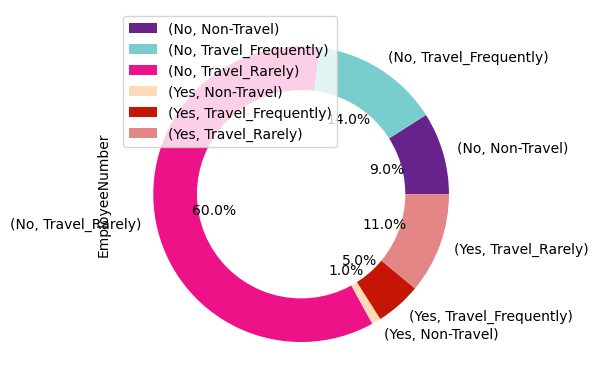

In [19]:
round(df.groupby(['Attrition', 'BusinessTravel']).count()[['EmployeeNumber']]/df.shape[0]*100).plot.pie(autopct = "%1.1f%%", subplots = True, colors = ["#68228B" , '#79CDCD' , '#EE1289' , '#FFDAB9', '#C51605', '#E48586'])
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

- <span style = 'font-size:17px;'> It is observed that the number of Attrion is higher in travel rarely employees but that's because travel rarely employees are the most of the employees so if we calculate their percentages it will be as the following </span>
- <span style = 'font-size:17px;'> The percentage of Attrition of employees who don't travel is 1/10\*100 = 10%. </span>
- <span style = 'font-size:17px;'> The percentage of Attrition of employees who travel rarely is 11/71\*100 = 15.5%. </span>
- <span style = 'font-size:17px;'> The percentage of Attrition of employees who travel frequently is 5/19\*100 = 26.3%. </span>
- <span style = 'font-size:17px;'> The difference of percentages is significant but not proportional so the answer to the question is **yes, Attrition is affected by Business travels because when the employees travel more the Attrition increase**. </span>
- <span style = 'font-size:17px;'> *The reason for this may be because when an employee of high degree travels, he gets a better opportunity abroad which makes him leave the current company*. </span>

***
## Question 3: What is effect of the distance from home on attrition ?

<Axes: xlabel='Attrition', ylabel='DistanceFromHome'>

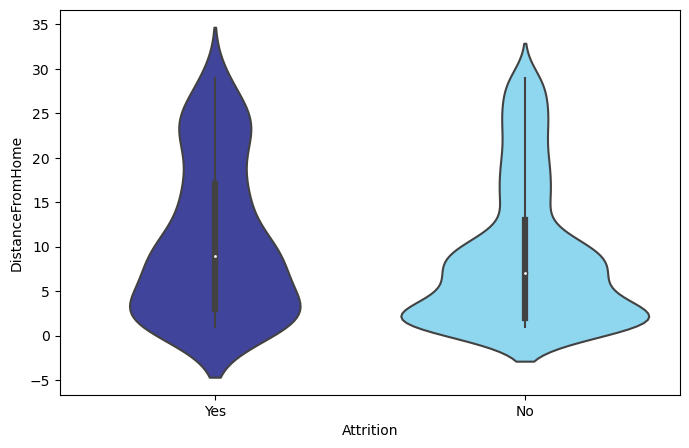

In [20]:
plt.figure(figsize=(8, 5))
sns.violinplot(data = df, y = 'DistanceFromHome', x = 'Attrition', palette = ['#3236AA', '#7FDEFF'])

- <span style = 'font-size:17px;'> It is observed that as the distance from home increase, the attrition increase. It is also observed that when the distnace from home increase than 33, the employees do not continue </span>
- <span style = 'font-size:17px;'> The answer to the question is **yes, Attrition is affected by distance from home**. </span>

***
## Question 4: People who live more than 25 minutes away from work tend to be less happy than those who don't. Lets see whether this is the case.

- <span style = 'font-size:17px;'> The data we have is distance from home and we want to measure the satisfaction of people with their jobs when the time to work is more than 25 minutes. </span>
- <span style = 'font-size:17px;'> Assuming the data is from USA, the distance will be in miles. From this source https://www.zippia.com/advice/average-commute-time-statistics/, we can conclude that if the average time to work is 27.6 minutes and average distance to work is 20.5 miles, then we can assume that the average mile takes 27.6/20.5 minutes which is 1.34 minute per mile. </span>
- <span style = 'font-size:17px;'> We will use a dataframe for this question only so we can masure job satisfaction for employees who travel more than 25 minutes a day to work. </span>

In [21]:
TimeFromHome = df['DistanceFromHome'].rename('TimeFromHome')*1.34
TimeFromHome

0        1.34
1       10.72
2        2.68
3        4.02
4        2.68
        ...  
1465    30.82
1466     8.04
1467     5.36
1468     2.68
1469    10.72
Name: TimeFromHome, Length: 1470, dtype: float64

<Axes: xlabel='TimeFromHome', ylabel='JobSatisfaction'>

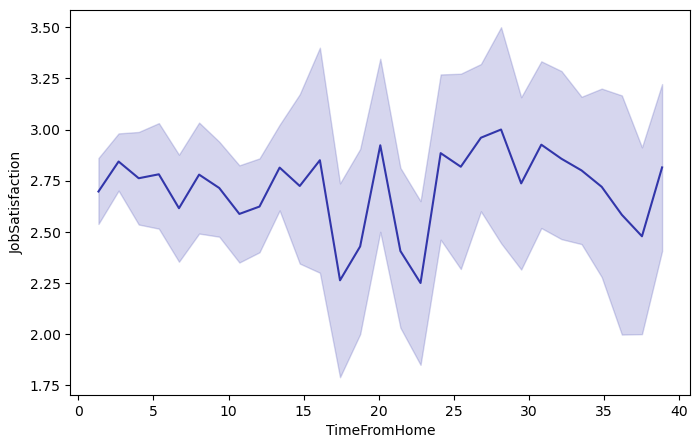

In [22]:
plt.figure(figsize=(8, 5))
sns.lineplot(x = TimeFromHome, y = df['JobSatisfaction'], color = '#3236AA')

<Axes: xlabel='TimeFromHome', ylabel='Attrition'>

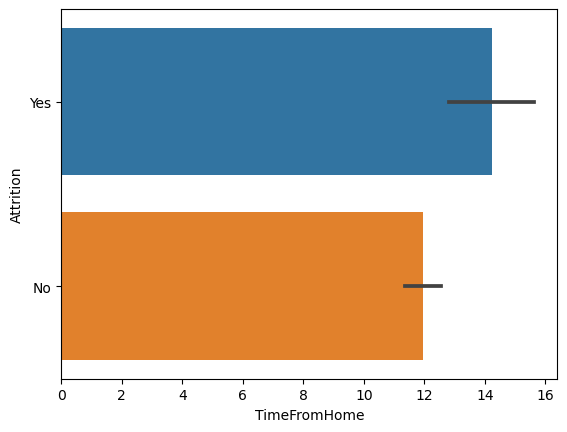

In [23]:
sns.barplot(data = df, x = TimeFromHome, y = "Attrition")

- <span style = 'font-size:17px;'> It is observed that at 23 minutes it is the lowest of job satisfaction but it increases again. </span>
- <span style = 'font-size:17px;'> It is also observed that as time from home increase attrition increase which can be also a measure of job satisfaction. </span>
- <span style = 'font-size:17px;'> The answer to the question is **People who live at 23 minutes are the least happy due to job satisfaction is at lowest**. </span>

***
## Question 5: What is the most Department of attritions ? Does the Department of work impact attrition?

In [24]:
df.groupby(['Attrition', 'Department']).count()[['EmployeeNumber']]

EmployeeNumber
Attrition Department                            
No        Human Resources                     51
          Research & Development             828
          Sales                              354
Yes       Human Resources                     12
          Research & Development             133
          Sales                               92

array([<Axes: ylabel='EmployeeNumber'>], dtype=object)

<Figure size 800x1000 with 0 Axes>

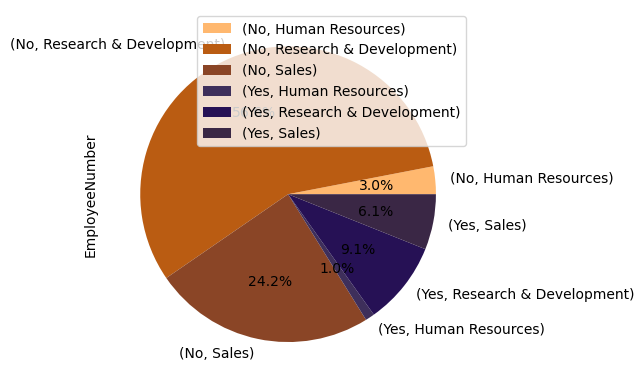

In [25]:
plt.figure(figsize=(8, 10))
round(df.groupby(['Attrition', 'Department']).count()[['EmployeeNumber']]/df.shape[0]*100).plot.pie(autopct = "%1.1f%%", subplots = True, colors = ["#FFB86F" , '#BA5C12' , '#8A4526' , '#3E2F5B', '#261155', '#3A2745'])

- <span style = 'font-size:17px;'> It is observed that the number of Attrion is higher in search and development employees but that's because research and development employees are the most of the employees so if we calculate their percentages it will be as the following </span>
- <span style = 'font-size:17px;'> The percentage of Attrition of the research and devolopment employees is 9.1/65.4\*100 = 13.9%. </span>
- <span style = 'font-size:17px;'> The percentage of Attrition of sales employees is 6.1/30.3\*100 = 20.1%. </span>
- <span style = 'font-size:17px;'> The percentage of Attrition of Human Resources employees is 1/4\*100 = 25%. </span>
- <span style = 'font-size:17px;'> The answer to the question is **The most number of attritions is from research and development department while the most percentage of attritions is from HR department**. </span>

***
## Question 6: What is effect of YearsWithCurrManager on attrition ? Are managers a reason of people resigning ?

<Axes: xlabel='Attrition', ylabel='YearsWithCurrManager'>

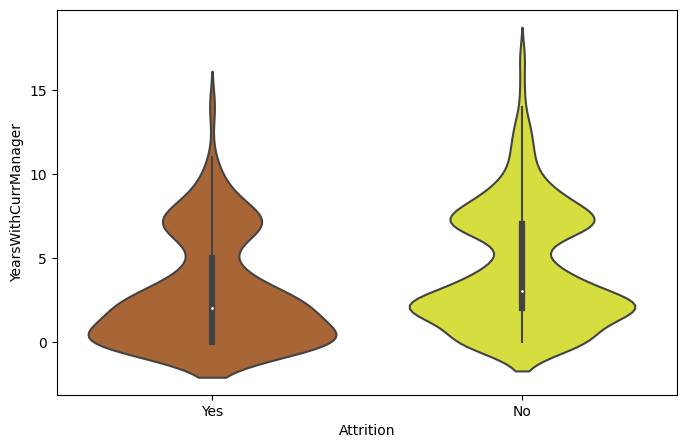

In [26]:
plt.figure(figsize=(8, 5))
sns.violinplot(data = df, y = 'YearsWithCurrManager', x = 'Attrition', palette = ['#BB6323', '#EEF723'])

- <span style = 'font-size:17px;'> It is observed that as the years with current manager increase the attrition decreases </span>
- <span style = 'font-size:17px;'> It is also noted that there are no attritions when the years with current manager is more than 15 years </span>
- <span style = 'font-size:17px;'> The answer to the question is **yes, Attrition is affected by years with current manager and they are inversely proportional**. </span>
- <span style = 'font-size:17px;'> *The reason for this may be because the trust between the employee and his manager increases as the years go by and the relationship with the manager is more friendly*. </span>

In [27]:
df.groupby('Attrition').count()['EmployeeNumber']

Attrition
No     1233
Yes     237
Name: EmployeeNumber, dtype: int64

In [28]:
df[df['YearsWithCurrManager']<= 1].groupby('Attrition').count()['EmployeeNumber']

Attrition
No     243
Yes     96
Name: EmployeeNumber, dtype: int64

- <span style = 'font-size:17px;'> From the previous two cells we can notice that 96 of the 237 attrition are due to new managers in the last year which is 40.5% of attritions </span>
- <span style = 'font-size:17px;'> The answer to the other question is **yes, new managers lead to resignation of the employees**. </span>
- <span style = 'font-size:17px;'> *The reason for this may be because when some managers leave they take their favourite employees with them and sometimes when a new manager is hired he can't win the trust of his underlings which leads to resignations of some employees*. </span>

***
## Question 7: What is the most job role of attritions ?

In [29]:
df.groupby(['Attrition', 'JobRole']).count()[['EmployeeNumber']]

EmployeeNumber
Attrition JobRole                                  
No        Healthcare Representative             122
          Human Resources                        40
          Laboratory Technician                 197
          Manager                                97
          Manufacturing Director                135
          Research Director                      78
          Research Scientist                    245
          Sales Executive                       269
          Sales Representative                   50
Yes       Healthcare Representative               9
          Human Resources                        12
          Laboratory Technician                  62
          Manager                                 5
          Manufacturing Director                 10
          Research Director                       2
          Research Scientist                     47
          Sales Executive                        57
          Sales Representative                   33

<Axes: xlabel='Attrition', ylabel='count'>

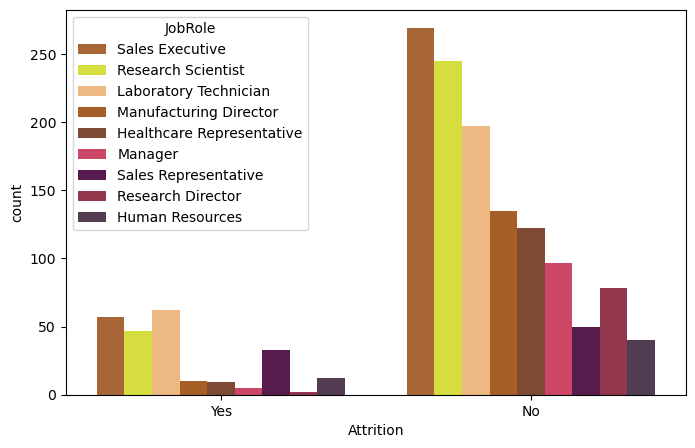

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(data = df, x = 'Attrition', hue = 'JobRole', palette = ['#BB6323', '#EEF723', "#FFB86F" , '#BA5C12' , '#8A4526' , '#E32F5B', '#621155', '#A32745', '#553856'])

- <span style = 'font-size:17px;'> It is observed that number of attritions is highest at the laboratory technicians but the precentage is not the highest because:</span>
- <span style = 'font-size:17px;'> The percentage of attrition in laboratory technicians is 62/259\*100 which is 23.9% </span>
- <span style = 'font-size:17px;'> while the percentage of attrition in sales representative is 33/83\*100 which is 39.8% </span>
- <span style = 'font-size:17px;'> The answer to the question is **The most number of attritions is laboratory technicians but the largest percentage of attritions is in sales representatives**. </span>
- <span style = 'font-size:17px;'> *I think that the reason for this is because the laboratory technicians can work freelance and not with a company. Moreover, sales representatives may be promoted and change roles that's why the percentage of attritions is large*. </span>

***
## Question 8: Is salary is one of the main reasons?

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

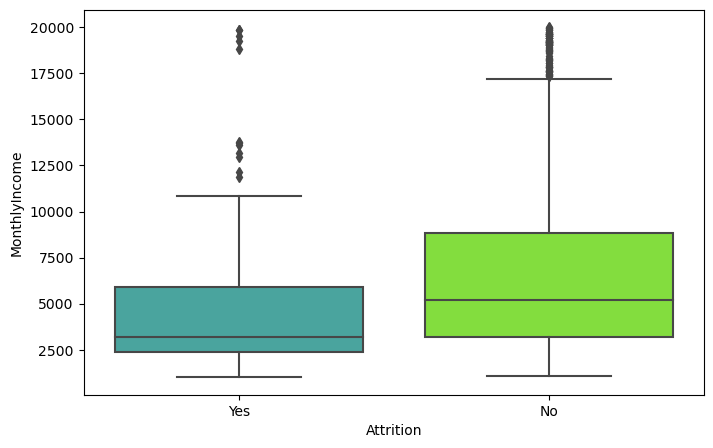

In [31]:
plt.figure(figsize=(8, 5))
sns.boxplot(data = df, y = 'MonthlyIncome', x = 'Attrition', palette = ['#3BB3AB', '#7FF723'])

- <span style = 'font-size:17px;'> It is observed that as the salary increases the number of attrition decreases </span>
- <span style = 'font-size:17px;'> It is also noted that there are outliers of attritions for salaries higher than 11000 </span>
- <span style = 'font-size:17px;'> The answer to the question is **yes, Attrition is affected by the salary and they are inversely proportional**. </span>
- <span style = 'font-size:17px;'> *The outliers in attrition could be due to having a better opportunity in another company and it is known that as the salary is higher the available opportunities become less that's why attritions at high salary is outliers*. </span>

***
## Question 9: Does hike percentage impact Attrition?

In [32]:
group = df.groupby('Attrition')['MonthlyIncome', 'PercentSalaryHike','HourlyRate', 'MonthlyRate'].mean()
group

/tmp/ipykernel_21/2285305870.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = df.groupby('Attrition')['MonthlyIncome', 'PercentSalaryHike','HourlyRate', 'MonthlyRate'].mean()


,MonthlyIncome,PercentSalaryHike,HourlyRate,MonthlyRate
Attrition,,,,
No,6832.739659,15.231144,65.952149,14265.779400
Yes,4787.092827,15.097046,65.573840,14559.308017


<span style = 'font-size:17px;'> It is observed from the previous table that the mean income for the leaving employees is less than the continuing employees </span>

<Axes: xlabel='PercentSalaryHike', ylabel='Attrition'>

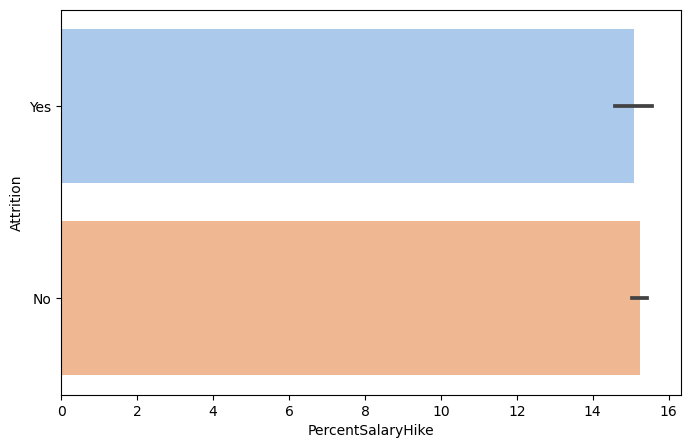

In [33]:
plt.figure(figsize=(8, 5))
sns.barplot(data = df, x = 'PercentSalaryHike', y = 'Attrition', palette = 'pastel')

- <span style = 'font-size:17px;'> It is observed from the table that Salary hike mean is the same for most of the employees. </span>
- <span style = 'font-size:17px;'> It is also noted that it doesn't affect the Attrition. </span>
- <span style = 'font-size:17px;'> The answer to the question is **No, Attrition is not affected by the salary hike**. </span>
- <span style = 'font-size:17px;'> *This could be due to the salary hike does not differ significantly between the different employees*. </span>

***
## Question 10: Does company stocks for employees impact attrition?

In [34]:
df.groupby(['Attrition', 'StockOptionLevel']).count()[['EmployeeNumber']]

EmployeeNumber
Attrition StockOptionLevel                
No        0                            477
          1                            540
          2                            146
          3                             70
Yes       0                            154
          1                             56
          2                             12
          3                             15

<span style = 'font-size:17px;'> It is observed from the previous table that as the stock level increase the numbers decrease </span>

In [35]:
fig = px.sunburst(df, path=['Attrition', 'StockOptionLevel'])
fig.show()

- <span style = 'font-size:17px;'> It is observed that the number of Attrion is less in the higher stock option levels but the percentage may be different. </span>
- <span style = 'font-size:17px;'> The percentage of Attrition of employees whose stock level is 0 154/631\*100 = 24.4%. </span>
- <span style = 'font-size:17px;'> The percentage of Attrition of employees whose stock level is 1 56/596\*100 = 9.4%. </span>
- <span style = 'font-size:17px;'> The percentage of Attrition of employees whose stock level is 2 12/158\*100 = 7.6%. </span>
- <span style = 'font-size:17px;'> The percentage of Attrition of employees whose stock level is 3 15/85\*100 = 17.7%. </span>
- <span style = 'font-size:17px;'> The difference of percentages is clear so the answer to the question is **yes, Attrition is affected by stock option level because when the employees have higher stock option level the attrition decrease except for who has level 3 and this can be clarified in the following point**. </span>
- <span style = 'font-size:17px;'> *The reason for this may be because when an employee has higher stock level option in a company he contributes to both of the company's money and his own money which makes him more attached to the company **but why does the level 3 has high attritions?** <br>This could be due to the employees have high shares in the company that can afford them to leave the company and trade in its stocks*. </span>

***
## Question 11: How much does income matter?

In [36]:
df_numeric_attrition = df.copy()
df_numeric_attrition['Attrition'].replace('Yes', 0, inplace = True)
df_numeric_attrition['Attrition'].replace('No', 1, inplace = True)

<Axes: >

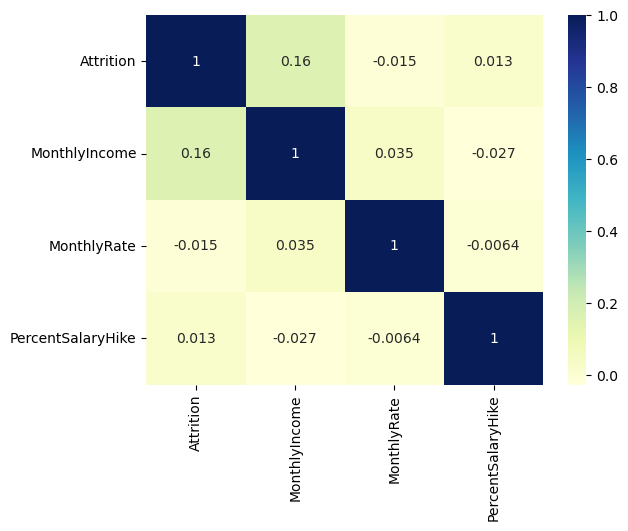

In [37]:
sns.heatmap(df_numeric_attrition[['Attrition', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike']].corr(), annot = True, cmap = 'YlGnBu')

- <span style = 'font-size:17px;'> From the previous heatmap the **income is correlated with attrition in 16%** and income related features such as Monthly rate and percent salary hike is not very significant. </span>

***
## Question 12: what is effect of age on attrition ?
## َQuestion 13: What role does gender and age play in this workplace?

In [38]:
df.groupby(['Attrition', 'Gender'])[['Age']].mean()

Age
Attrition Gender           
No        Female  38.155689
          Male    37.154372
Yes       Female  32.574713
          Male    34.206667

- <span style = 'font-size:17px;'> From the previous table we can observe that the leaving employees are younger</span>
- <span style = 'font-size:17px;'> We can also observe that the attrition is highest in younger females </span>

In [39]:
color_map = {  'Yes': 'brown','No': 'gold'      # Custom colors for the map
            }
fig = px.sunburst(df, path=['Attrition', 'Gender', 'Age'], branchvalues='total', color = 'Attrition', color_discrete_map = color_map)
fig.show()

- <span style = 'font-size:17px;'> It is observed that younger people has higher attrition rates </span>
- <span style = 'font-size:17px;'> The difference of percentages is clear so the answer to the question is **yes, Attrition is affected by age and gender**. </span>
- <span style = 'font-size:17px;'> *The reason for this may be due to the elder people have more responsibilities so they need the job.*</span>
- <span style = 'font-size:17px;'> *Moreover, younger women has higher attrition rates due to family responsibilities and if they get pregnant.*</span>

***
## Question 14: How does work experience affect attrition?

In [40]:
exp = df.groupby(['Attrition'])[['TotalWorkingYears']].mean()
exp

,TotalWorkingYears
Attrition,
No,11.862936
Yes,8.244726


- <span style = 'font-size:17px;'> From the previous table we can observe that as the work experience increases attrition decreases.</span>

<Axes: xlabel='TotalWorkingYears', ylabel='Density'>

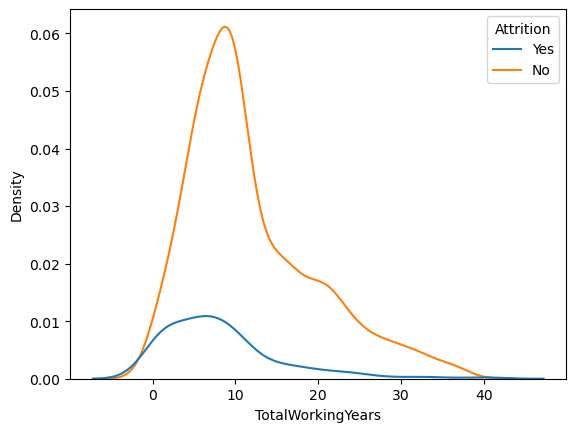

In [41]:
sns.kdeplot(data = df, x = 'TotalWorkingYears', hue = 'Attrition')

- <span style = 'font-size:17px;'> It is observed that younger people has higher attrition rates </span>
- <span style = 'font-size:17px;'> From the previous graph we can see that there are higher attrition rates at less work experiece so the answer to the question is **yes, Attrition is affected by work experience**. </span>
- <span style = 'font-size:17px;'> *There are also people with larger experience who left the company, this can be due to getting old and retiring.*</span>

***
## Question 15: Do Education Field play a role? Which Education Field is more likely to leave?

In [42]:
df.groupby(['Attrition', 'EducationField']).count()[['EmployeeNumber']]

EmployeeNumber
Attrition EducationField                  
No        Human Resources               20
          Life Sciences                517
          Marketing                    124
          Medical                      401
          Other                         71
          Technical Degree             100
Yes       Human Resources                7
          Life Sciences                 89
          Marketing                     35
          Medical                       63
          Other                         11
          Technical Degree              32

- <span style = 'font-size:17px;'> From the previous table we can observe that largest attrition number is from Life sciences but largest percentage is from Human Resources field with 7/27\*100 = 25.9%.</span>

<Axes: xlabel='EducationField', ylabel='Count'>

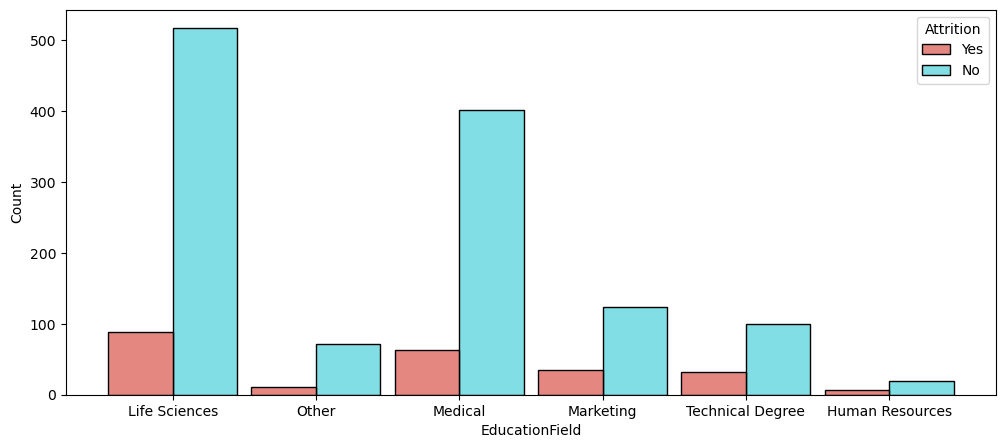

In [43]:
plt.figure(figsize=(12, 5))
sns.histplot(data = df, x = 'EducationField', hue = 'Attrition', multiple = 'dodge', shrink = 0.9, palette = 'hls')

- <span style = 'font-size:17px;'> It is observed that the percent of Human Resources attrition is higher although the numbers of attritions of life sciences field is the highest. </span>
- <span style = 'font-size:17px;'> Therfore, the answer is **yes, Attrition is affected by education field**. </span>

***
## Question 16: Are more educated people more likely to leave?

In [44]:
df.groupby(['Attrition', 'Education']).count()[['EmployeeNumber']]

EmployeeNumber
Attrition Education                
No        1                     139
          2                     238
          3                     473
          4                     340
          5                      43
Yes       1                      31
          2                      44
          3                      99
          4                      58
          5                       5

- <span style = 'font-size:17px;'> From the previous table we can observe that least attrition number is the highest education field and the least percentage is from the highest education field of 10.4% while the largest percentage is from the 3rd education level of 17.3%.</span>

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1200x500 with 0 Axes>

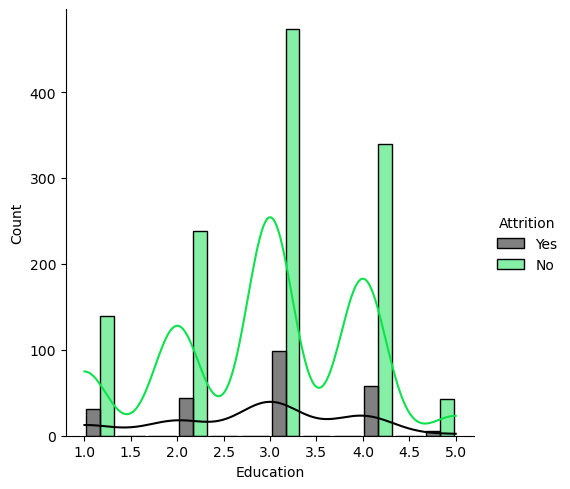

In [45]:
plt.figure(figsize=(12, 5))
sns.displot(data = df, x = 'Education', hue = 'Attrition', multiple = 'dodge', shrink = 0.9, palette = ['#020202', '#0DE24D'], kde = True)

- <span style = 'font-size:17px;'> It is observed that the percent of Human Resources attrition is higher although the numbers of attritions of life sciences field is the highest. </span>
- <span style = 'font-size:17px;'> The answer is **yes, Attrition is affected by education level**. </span>
- <span style = 'font-size:17px;'> **But why it is not directly proportional?**. </span>
- <span style = 'font-size:17px;'> *My guess is because at higher education level the job can be comfortable so no needto leave while third education level is more available to learn and increase his education level*. </span>

***
# Satisfaction questions:
## Question 17: How does the environment satisfaction impact attrition?

In [46]:
df.groupby(['Attrition', 'EnvironmentSatisfaction']).count()[['EmployeeNumber']]

EmployeeNumber
Attrition EnvironmentSatisfaction                
No        1                                   212
          2                                   244
          3                                   391
          4                                   386
Yes       1                                    72
          2                                    43
          3                                    62
          4                                    60

- <span style = 'font-size:17px;'> From the previous table we can observe that highest attrition number is least environment satisfaction with highest percentage of 25.3%.</span>

<Axes: xlabel='EnvironmentSatisfaction', ylabel='Density'>

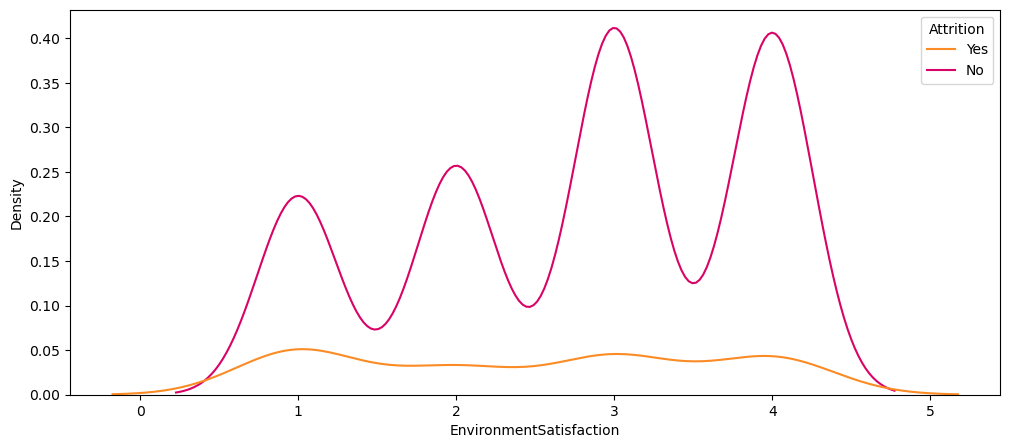

In [47]:
plt.figure(figsize=(12, 5))
sns.kdeplot(data = df, x = 'EnvironmentSatisfaction', hue = 'Attrition', palette = ['#FB8B24', '#D90368'])

- <span style = 'font-size:17px;'> The answer is absolutely **yes, Attrition is affected by environment satisfaction and it is inversely proportional**. </span> <br>
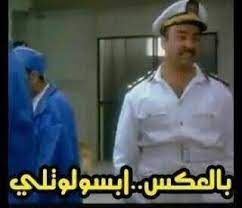

***
## Question 18: How does self Job Satisfaction impact the Attrition?

In [48]:
df.groupby(['Attrition', 'JobSatisfaction']).count()[['EmployeeNumber']]/df.shape[0]*100

EmployeeNumber
Attrition JobSatisfaction                
No        1                     15.170068
          2                     15.918367
          3                     25.102041
          4                     27.687075
Yes       1                      4.489796
          2                      3.129252
          3                      4.965986
          4                      3.537415

- <span style = 'font-size:17px;'> From the previous table we can observe that highest attrition number are from the moderately satisfied but the highest percentage is from the least satisfied employees of 4.49/15.17\*100 = 29.6%.</span>

<Axes: xlabel='Attrition', ylabel='JobSatisfaction'>

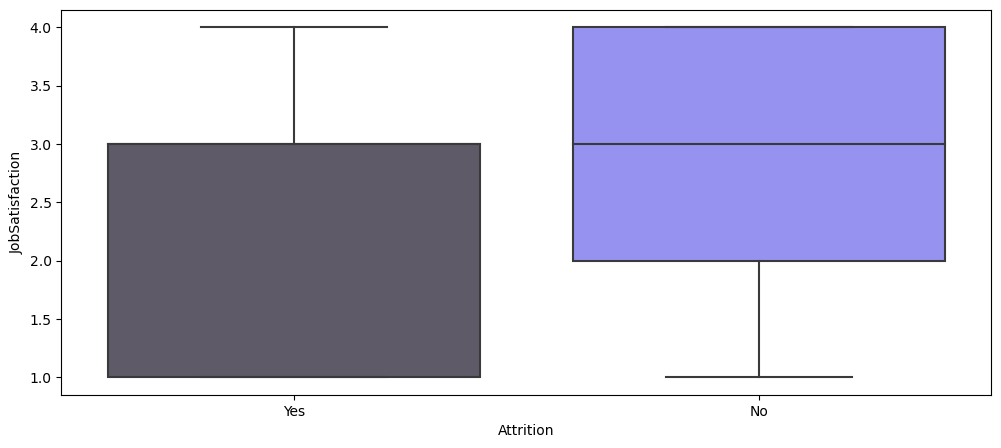

In [49]:
plt.figure(figsize=(12, 5))
sns.boxplot(data = df, x = 'Attrition', y = 'JobSatisfaction', palette = ['#5D576B', '#8884FF'])

- <span style = 'font-size:17px;'> The answer is absolutely **yes, Attrition is affected by job satisfaction and it is inversely proportional**. </span> 

***
## Question 19: How does Work Life Balance impact the overall attrition rates?

In [50]:
df.groupby(['Attrition', 'WorkLifeBalance']).count()[['EmployeeNumber']]

EmployeeNumber
Attrition WorkLifeBalance                
No        1                            55
          2                           286
          3                           766
          4                           126
Yes       1                            25
          2                            58
          3                           127
          4                            27

- <span style = 'font-size:17px;'> From the previous table we can observe that highest attrition number are from the moderately balanced employees but the highest percentage is from the least balanced employees of 25/80\*100 = 31.2%.</span>

<Axes: xlabel='count', ylabel='WorkLifeBalance'>

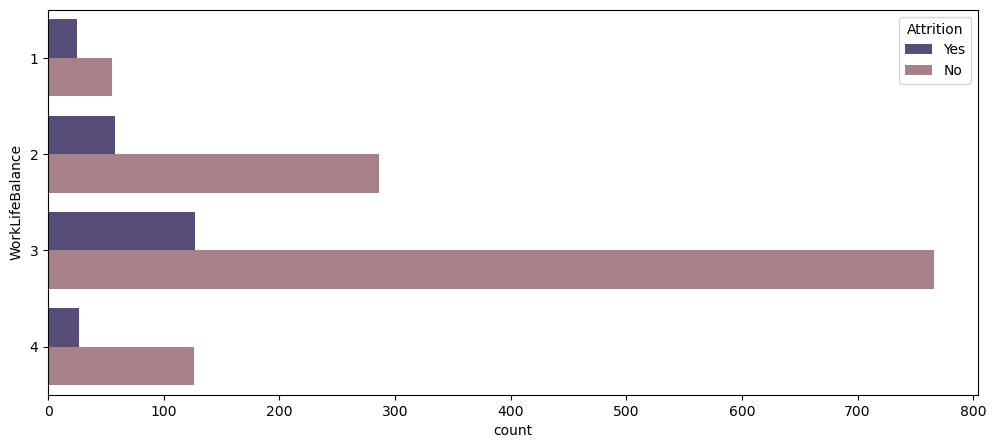

In [51]:
plt.figure(figsize=(12, 5))
sns.countplot(data = df, y = 'WorkLifeBalance', hue = 'Attrition', palette = ['#54457F', '#AC7B84'])

- <span style = 'font-size:17px;'> The answer is absolutely **yes, Attrition is affected by work-life balance and it is inversely proportional**. </span> 

## Question 20: How does satisfaction and work-life balance relate to employee retention?
## Question 21: Is it possible that employees are leaving because of the work environment?

- <span style = 'font-size:17px;'> These questions were both answered in the previous 3 questions where **the satisfaction and work-life balance are strongly related to the employee retention**. </span>
- <span style = 'font-size:17px;'> Moreover, **IT IS POSSIBLE that the employees are leaving due to work environment**. </span> 

***
## Question 22: How does work duration in current role impact Attrition?

In [52]:
df.groupby(['Attrition'])[['YearsInCurrentRole']].mean()

,YearsInCurrentRole
Attrition,
No,4.484185
Yes,2.902954


- <span style = 'font-size:17px;'> Obviously, as the years in current role increases the attrition decreases.</span>

<Axes: xlabel='YearsInCurrentRole', ylabel='Attrition'>

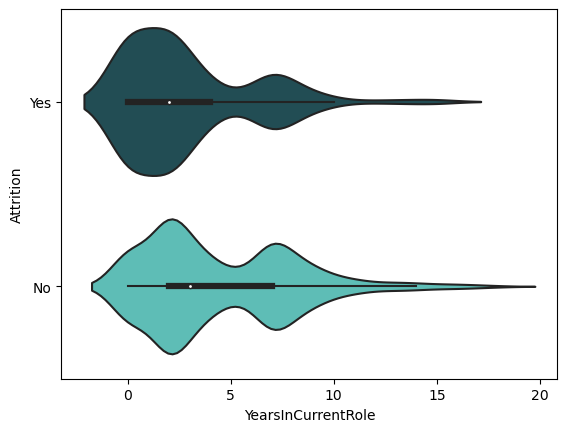

In [53]:
sns.violinplot(data = df, x = 'YearsInCurrentRole', y = 'Attrition', palette = ['#1A535C', '#4ECDC4'])

- <span style = 'font-size:17px;'> It is observed that as the years with in the current role increase the attrition decreases </span>
- <span style = 'font-size:17px;'> It is also noted that there are no attritions when the years in the current role is more than 17 years </span>
- <span style = 'font-size:17px;'> The answer to the question is **yes, Attrition is affected by years in current role and they are inversely proportional**. </span>
- <span style = 'font-size:17px;'> *This could be due to the employee's work becomes a habit when he stays in a certain role for some time*. </span>

***
## Question 23: Do overtime stresses employees and makes them have to leave?

In [54]:
df.groupby(['Attrition', 'OverTime']).count()[['EmployeeNumber']]/df.shape[0]*100

EmployeeNumber
Attrition OverTime                
No        No             64.217687
          Yes            19.659864
Yes       No              7.482993
          Yes             8.639456

- <span style = 'font-size:17px;'> From the previous table we can notice that the percentage and the number of attritions of overtime employees is larger with a percentage of 8.63/28.29\*100 = 30.5% of overtime employees.</span>

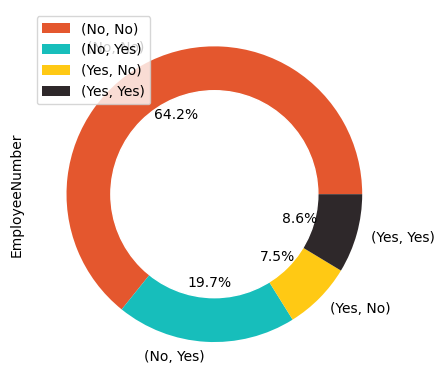

In [55]:
round(df.groupby(['Attrition', 'OverTime']).count()[['EmployeeNumber']]/df.shape[0]*100, 2).plot.pie(autopct = "%1.1f%%", subplots = True, colors = ["#E4572E" , '#17BEBB' , '#FFC914' , '#2E282A'])
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

- <span style = 'font-size:17px;'> The answer to the question is **yes, overtime stresses employees and makes them want to leave**. </span>

***
## Question 24: Is JobLevel equivalent to performance? Can we create a feature to measure this?

In [56]:
df['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [57]:
df.groupby(['JobLevel', 'PerformanceRating']).count()[['EmployeeNumber']]

EmployeeNumber
JobLevel PerformanceRating                
1        3                             455
         4                              88
2        3                             454
         4                              80
3        3                             185
         4                              33
4        3                              88
         4                              18
5        3                              62
         4                               7

In [58]:
df[['JobLevel', 'PerformanceRating']].corr()

,JobLevel,PerformanceRating
JobLevel,1.000000,-0.021222
PerformanceRating,-0.021222,1.000000


- <span style = 'font-size:17px;'> From the previous table we can notice that the largest number of high rating employees are from the least job level but that's due to the majority of the employees are from job level 1 so the percentages are as the following:</span>
- <span style = 'font-size:17px;'> The percentage of high rated employees whose job level is 1 88/543\*100 = 16.2%. </span>
- <span style = 'font-size:17px;'> The percentage of high rated employees whose job level is 2 80/534\*100 = 14.98%. </span>
- <span style = 'font-size:17px;'> The percentage of high rated employees whose job level is 3 33/218\*100 = 15.1%. </span>
- <span style = 'font-size:17px;'> The percentage of high rated employees whose job level is 4 18/106\*100 = 16.9%. </span>
- <span style = 'font-size:17px;'> The percentage of high rated employees whose job level is 5 7/69\*100 = 10.4%. </span>
- <span style = 'font-size:17px;'> The difference of percentages is insignificant and the relation between the two features is very small. Therefore, **The job level is not equivalent to employee performance rating**. </span>
- <span style = 'font-size:17px;'> *The reason for this may be because an employee at any job level can be a hard worker and of high rated performance*. </span>

In [59]:
# To create a feature that scores employees along their job level and performance rating
JobLevelPerformance = df['JobLevel']*df['PerformanceRating']
JobLevelPerformance.value_counts()

3     455
6     454
9     185
12    121
4      88
8      80
15     62
16     18
20      7
dtype: int64

<Axes: ylabel='Density'>

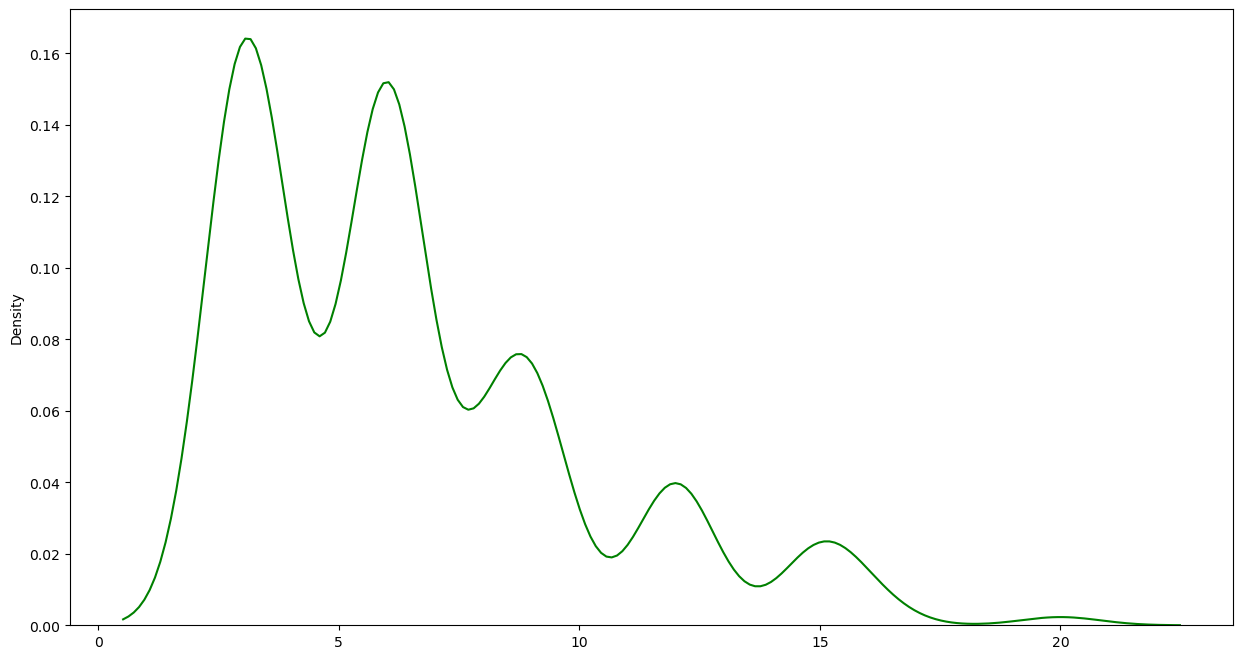

In [60]:
plt.figure(figsize=(15, 8))
sns.kdeplot(JobLevelPerformance, color = 'green')

***
## Question 25: What factors contribute to retaining high performing employees?
### First categorical factors

In [61]:
df.groupby(['PerformanceRating', 'Gender']).count()[['EmployeeNumber']]

EmployeeNumber
PerformanceRating Gender                
3                 Female             494
                  Male               750
4                 Female              94
                  Male               132

- <span style = 'font-size:17px;'> From the previous table we can notice that the percentage of high performing females is 94/588\*100 = 15.9 while the percentage of high performing males is 132/882\100 = 14.9 .</span>

In [62]:
df.groupby(['PerformanceRating', 'BusinessTravel']).count()[['EmployeeNumber']]

EmployeeNumber
PerformanceRating BusinessTravel                   
3                 Non-Travel                    124
                  Travel_Frequently             231
                  Travel_Rarely                 889
4                 Non-Travel                     26
                  Travel_Frequently              46
                  Travel_Rarely                 154

- <span style = 'font-size:17px;'> From the previous table we can notice that the highest percentage of high performing employees are the non travel where they are 26/150\*100 = 17.3% .</span>

In [63]:
df.groupby(['PerformanceRating', 'Department']).count()[['EmployeeNumber']]

EmployeeNumber
PerformanceRating Department                            
3                 Human Resources                     54
                  Research & Development             805
                  Sales                              385
4                 Human Resources                      9
                  Research & Development             156
                  Sales                               61

- <span style = 'font-size:17px;'> From the previous table we can notice that the percentage of th highest performing employees in Research and development is 156/961\*100 = 16.2%.

In [64]:
df.groupby(['PerformanceRating', 'JobRole']).count()[['EmployeeNumber']]

EmployeeNumber
PerformanceRating JobRole                                  
3                 Healthcare Representative             111
                  Human Resources                        45
                  Laboratory Technician                 217
                  Manager                                82
                  Manufacturing Director                118
                  Research Director                      72
                  Research Scientist                    243
                  Sales Executive                       285
                  Sales Representative                   71
4                 Healthcare Representative              20
                  Human Resources                         7
                  Laboratory Technician                  42
                  Manager                                20
                  Manufacturing Director                 27
                  Research Director                       8
                  Research Scientist                     49
                  Sales Executive                        41
                  Sales Representative                   12

- <span style = 'font-size:17px;'> From the previous table we can notice that the percentage of the highest performing employees are the managers is 20/102\*100 = 19.6%.

In [65]:
df.groupby(['PerformanceRating', 'MaritalStatus']).count()[['EmployeeNumber']]

EmployeeNumber
PerformanceRating MaritalStatus                
3                 Divorced                  279
                  Married                   567
                  Single                    398
4                 Divorced                   48
                  Married                   106
                  Single                     72

- <span style = 'font-size:17px;'> The difference in percentages are insignificant. </span>

In [66]:
df.groupby(['PerformanceRating', 'OverTime']).count()[['EmployeeNumber']]/df.shape[0]*100

EmployeeNumber
PerformanceRating OverTime                
3                 No             60.748299
                  Yes            23.877551
4                 No             10.952381
                  Yes             4.421769

- <span style = 'font-size:17px;'> The difference in percentages are insignificant. </span>
### Numerical factors

In [67]:
df.groupby(["PerformanceRating"])['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel', 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'RelationshipSatisfaction'
].mean()

/tmp/ipykernel_21/3642001895.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/tmp/ipykernel_21/3642001895.py:15: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction
PerformanceRating,,,,,,,,,,,,,,
3,36.916399,802.404341,9.098875,2.923633,2.735531,65.909968,2.738746,2.073955,2.727492,6537.274116,14342.859325,2.708199,14.003215,2.726688
4,36.964602,802.933628,9.707965,2.853982,2.646018,65.787611,2.681416,2.008850,2.734513,6313.893805,14149.314159,2.610619,21.849558,2.632743


- <span style = 'font-size:17px;'> It is observed that the performance rating is affected by Monthly Income and salary hike. </span>

In [68]:
df.groupby('PerformanceRating')['StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager'].mean()

/tmp/ipykernel_21/1582066645.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
PerformanceRating,,,,,,,,
3,0.792605,11.257235,2.807878,2.760450,6.999196,4.175241,2.163183,4.088424
4,0.800885,11.402655,2.752212,2.765487,7.057522,4.526549,2.323009,4.314159


- <span style = 'font-size:17px;'> The differences between percentages are insignificant. </span>

### List of factors affecting Performance rating:
1. Non travel
2. Managers in Job role
3. Monthly Income
4. Salary Hike

***
## Question 26: How many new hires leave in less than a year and why?

In [69]:
df[df['YearsInCurrentRole']<= 1].groupby('Attrition').count()['EmployeeNumber']

Attrition
No     217
Yes     84
Name: EmployeeNumber, dtype: int64

- <span style = 'font-size:17px;'> From the previous cell the number of new hires who leav in less than a year is 84.</span>

array([<Axes: ylabel='EmployeeNumber'>], dtype=object)

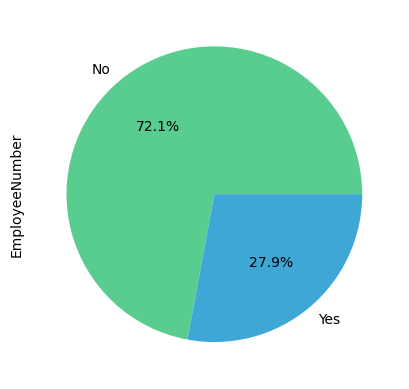

In [70]:
round(df[df['YearsInCurrentRole']<= 1].groupby('Attrition').count()['EmployeeNumber'], 2).plot.pie(autopct = "%1.1f%%", subplots = True, colors = ["#59CD90" , '#3FA7D6'])

- <span style = 'font-size:17px;'> *The reason of new hires leaving the company may be due to several reasons such as:*. </span>
1. getting a better opportunity for juniors.
2. Not comfortable in the new company.
3. The new manager is stressful.


***
## Question 27: What is the rate of resignations each year versus the rate of new appointments?

In [71]:
df[df['YearsInCurrentRole']<= 1]["EmployeeNumber"].count()

301

In [72]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

- <span style = 'font-size:17px;'> From the previous 2 cells the number of new hires a year is 301 while the number of resignations is 237.</span>

<Axes: xlabel='Attrition', ylabel='YearsInCurrentRole'>

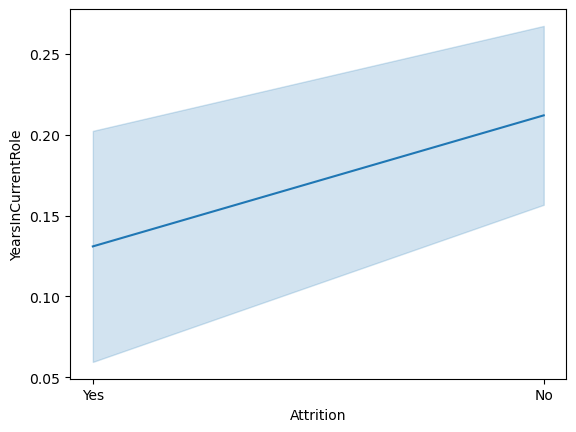

In [73]:
sns.lineplot(data = df[df['YearsInCurrentRole']<= 1], x = 'Attrition', y = 'YearsInCurrentRole')

- <span style = 'font-size:17px;'>We can see that the number of resignations is less than the number of new hires in a year.</span>

***
# Business questions
## Question 28: Does the source of the employee matter? Which website produces the best employees? What sources are best for high performing employees?
## Question 29: Which business unit faces the attrition problem?
## Question 30: What business value does the model bring?


- <span style = 'font-size:17px;'> **Ans 28.A:** Yes, the source of the employee matter. A new employee will affect the work environment whether positively or negatively that's why it is important to check the source of the employee.</span>
- <span style = 'font-size:17px;'> **Ans 28.BC:** According to the following link: https://careercloud.com/how-to-find-employees/, the fastest website to hire employees is zip recruiter while the most professional employee provider is LinkedIN. </span>
- <span style = 'font-size:17px;'> **Ans 29:** From question 5 we find that the most attritions are at the human resources department. According to the following link :https://www.aihr.com/blog/types-of-hr-operating-models/ the business model of human resources companies is Business partner model which will be the unit that faces the attrition problem.</span>
- <span style = 'font-size:17px;'> **Ans 30:** If the company income is available in the data we can calculate the employee's worth in the company's profit and if the attrition will affect the company's profit or not. Using the given data we can calculate how much the company will save by not paying the salary of the leaving employees. </span>

***
## Question 31: Will the model save lots of money?

In [74]:
df[df['Attrition']<= 'Yes']['MonthlyIncome'].sum()

9559309

- <span style = 'font-size:17px;'> This model will save 9,559,309$ in monthly incomes. </span>

***
## Question 32: What factors are contributing more to employee attrition? Is income the main factor towards employee attrition?
## Question 33: What type of measures should the company take in order to retain their employees?

- <span style = 'font-size:17px;'> From the results we got in the notebook we can define the factors that are contributing to the attrition of the employees: </span>
1. Income is one of the main factors.
2. The work environment.
3. Job and relationship satisfaction.
4. Work life balance.
5. distance from home.
6. Years at the company and with the same manager
- <span style = 'font-size:17px;'> *Income is one of the main factors but not the main factor*. </span>
<br><br>
### Measures should be taken in order to retain their employees:
1. Improve the environment and not to make it toxic environment.
2. Give high salary hike to encourage employees (The highest performance employees had high salary hike).
3. If the employee is far from the work, give him mileage bonus.
4. Make sure the employee is satisfied with his job.
5. Make events out of work to enhance the work-life balance.


***
# Thanks for reading
# Yours. **Ibrahim Hossam**